## Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

## Importing Data Set

In [2]:
path=r'C:\Users\sasze\Documents\Careerfoundry Data Analytics\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'us_pollution_cleaned.csv'), index_col = False)

In [4]:
#Remove the columns with NA values and categorical values
df=df.drop(columns=['State', 'SO2 AQI', 'CO AQI'])

## Elbow Technique

In [5]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [6]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [7]:
score

[-9.579757361172698e+16,
 -2.3991281302852456e+16,
 -1.0660958286740308e+16,
 -5989773136737738.0,
 -3832279924518085.0,
 -2665826146541251.5,
 -1959641251870957.5,
 -1498846905911354.2,
 -1183228670727043.0]

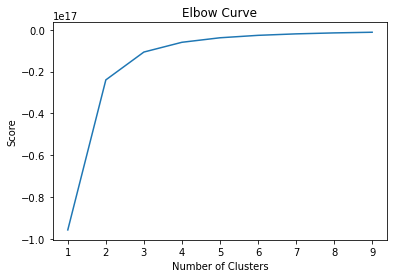

In [8]:
#Plot elbow Curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from 2 and 3 before the line straightens out. The optimal count for the clusters is 3.

## K-Means Algorithm

In [9]:
#Create k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [10]:
#Fit into data
kmeans.fit(df)

C:\Users\sasze\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [11]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\sasze\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [12]:
df.head()

,Unnamed: 0,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,clusters
0,0,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,1.145833,4.2,21,2
1,1,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,0.878947,2.2,23,2
2,2,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,1.145833,4.2,21,2
3,3,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,0.878947,2.2,23,2
4,4,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,0.850000,1.6,23,2


In [13]:
df['clusters'].value_counts()

0    349424
1    349333
2    347371
Name: clusters, dtype: int64

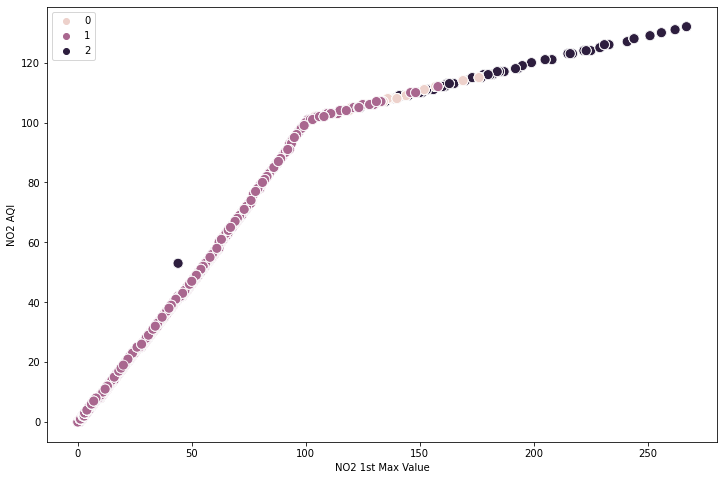

In [14]:
#Plot clusters 'NO2 1st Max Value' and 'NO2 AQI'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['NO2 1st Max Value'], y=df['NO2 AQI'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('NO2 1st Max Value')
plt.ylabel('NO2 AQI')
plt.show()

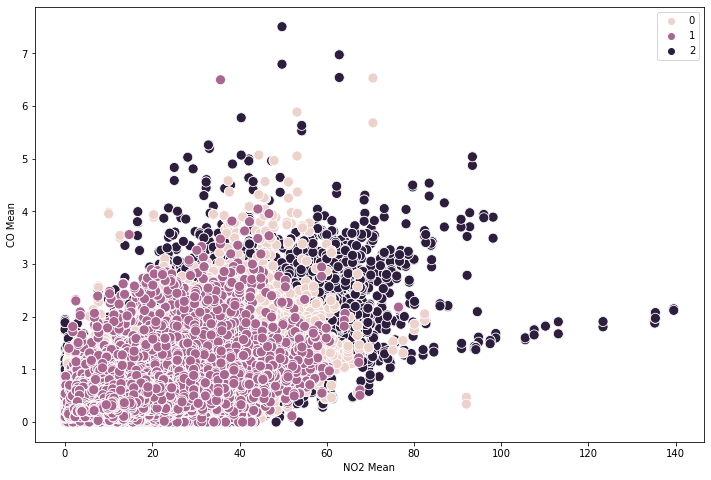

In [15]:
#Plot clusters 'NO2 Mean' and 'CO Mean'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['NO2 Mean'], y=df['CO Mean'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('NO2 Mean')
plt.ylabel('CO Mean')
plt.show()

In [16]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

These clusters make sense in the sense that the grow darker as time passes by. The data itself is set by the passing years and dates, making it organized as the years go by. These clusters show that as the years go by, the gas emmissions increase, adding more pollution into the air.

In [17]:
df.groupby('cluster').agg({'NO2 Mean':['mean', 'median'], 
                         'CO Mean':['mean', 'median'], 
                         'NO2 1st Max Value':['mean', 'median'],
                          'NO2 AQI':['mean', 'median']})

NO2 Mean              CO Mean           NO2 1st Max Value  \
                  mean     median      mean    median              mean   
cluster                                                                   
dark purple  16.908885  14.916667  0.518115  0.421739         31.817839   
pink         14.551214  12.782609  0.421526  0.354167         28.272691   
purple       11.972174  10.083333  0.327208  0.270833         24.237469   

                      NO2 AQI         
            median       mean median  
cluster                               
dark purple   30.0  30.084411     28  
pink          27.0  26.726899     25  
purple        23.0  22.856461     22

These results could be useful in identifying the gorwth of air pollution based on the two man gases that have the strongest relationship to contribute to the pollution.